Exploration B
The file iris.csv (available at https://tinyurl.com/ChrisCoDV/iris.csv) is a well-known dataset created by the statistician and biologist Ronald Fisher for a paper published in 1936. It contains measurements of 3 different varieties of iris flower, setosa, versicolor and virginica. For each variety there are 50 measurements each of sepal length & width and petal length & width.
It is well-known because the correlations of different measurements make it reasonably easy to identify the variety of an iris based just on their relative proportions. This makes it a good test case for machine learning algorithms.
For this exploration you will explore the different correlations.
1.	[The data in this dataset has no obvious index column](#1-the-data-in-this-dataset-has-no-obvious-index-column-recall-that-an-index-column-usually-has-a-unique-identifier-in-each-row) (recall that an index column usually has a unique identifier in each row). So first read the data in and check it is in the right format – there should be 5 columns (4 for the measurements and 1 for the variety) and 150 rows. [Hint: don't include the parameter index_col=0 when you read it in.]

2.	[Create a single visualisation showing scatter subplots](#2-create-a-single-visualisation-showing-scatter-subplots-for-all-pairs-of-measurements) for all pairs of measurements. You may find the following line of code useful:
selected = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']
Comment on the strongest correlation, visually.

3.	[Now confirm your findings by creating a heatmap showing the correlations between all the measurements](#3-now-confirm-your-findings-by-creating-a-heatmap). Which 3 pairs of measurements are most strongly correlated?

4.	[Next the aim is to investigate correlations within the different varieties](#4-next-the-aim-is-to-investigate-correlations-within-the-different-varieties). First of all create a dataframe containing just the data for the Setosa variety with the following line of code:
	data_setosa = data[data['variety'] == 'Setosa']
Now create a single visualisation showing scatter subplots for all pairs of measurements for Setosa irises. Which is the strongest correlation, visually?

5.	[A heatmap gives a more precise measure than scatter subplots, so create a heatmap](#now-create-a-single-visualisation-showing-scatter-subplot) showing the correlations between all pairs of measurements for Setosa irises. Comment on the strongest positive correlation. Is there any evidence of inverse correlations?

6.	[Repeat item 5 for Versicolor irises and then for Virginica irises](#6-repeat-item-5-for-versicolor-irises-and-then-for-virginica-irises).

7.	[Clearly different varieties of iris have different measurement correlations](#7-clearly-different-varieties-of-iris-have-different-measurement-correlations). It would be nice to summarise this in one single visualisation with different colours for each variety. To achieve this, repeat your code from item 2. However, this time rather than using sub.scatter() to visualise the whole dataset for each pair of measurements, use it repeatedly to visualise each variety. [Hint: replace the line of code containing sub.scatter() with 3 lines, each containing sub.scatter(), but each visualising a different variety].

Your final visualisation should look something like the one below.

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.style.use("ggplot")

### 1.	The data in this dataset has no obvious index column (recall that an index column usually has a unique identifier in each row).
 So first read the data in and check it is in the right format – there should be 5 columns (4 for the measurements and 1 for the variety) and 150 rows. [Hint: don't include the parameter index_col=0 when you read it in.]

In [2]:
# load the Iris dataset with pandas
iris = pd.read_csv("https://tinyurl.com/ChrisCoDV/iris.csv")
print(iris.shape)
iris.head()

(150, 5)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


### 2.	Create a single visualisation showing scatter subplots for all pairs of measurements.
You may find the following line of code useful:
- selected = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']
- Comment on the strongest correlation, visually.


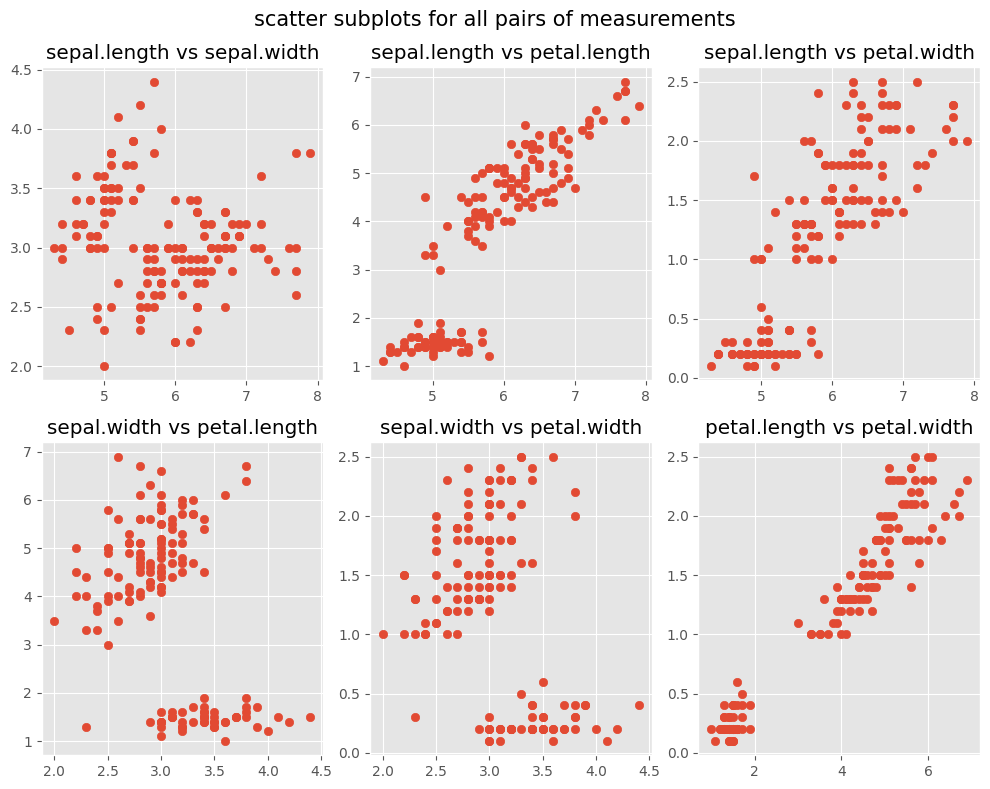

In [3]:
selected = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']
fig = plt.figure(figsize=(10,8))
fig.suptitle("scatter subplots for all pairs of measurements", fontsize=15)
index = 1

for i, name_i in enumerate(selected):
    for j in range(i+1, len(selected)):
        name_j = selected[j]
        ax = fig.add_subplot(2, 3, index)
        ax.scatter(iris[name_i], iris[name_j])
        ax.set(title=f"{name_i} vs {name_j}")
        index += 1
plt.tight_layout()
plt.show()

### 3.	Now confirm your findings by creating a heatmap
showing the correlations between all the measurements. Which 3 pairs of measurements are most strongly correlated?

C:\Users\abume\AppData\Local\Temp\ipykernel_15908\4015377225.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = iris.corr()


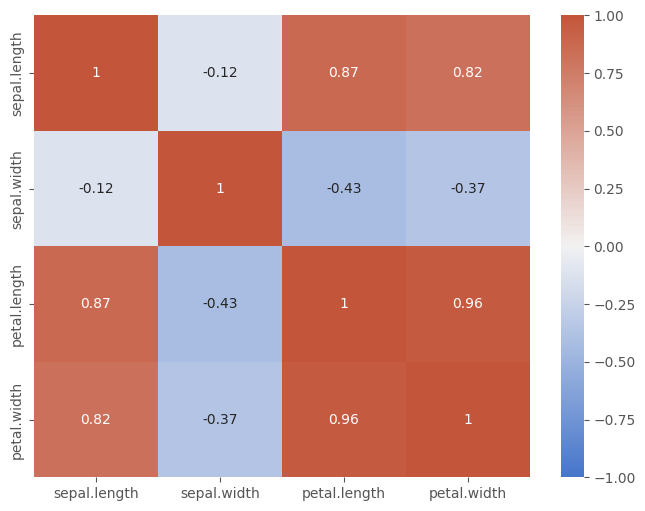

In [271]:
# create a correlation varibale
corr = iris.corr()

# visualise the correlations
fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap=sns.diverging_palette(255, 20, n=256))
ax.set_xticklabels(ax.get_xticklabels())
plt.show()

Most strongly correlated pairs:
- ("Petal.Width", "Sepal.Length")
- ("Petal.Width", "Petal.Length")
- ("Petal.Lenght", "Sepal.Length")

### 4.	Next the aim is to investigate correlations within the different varieties.

First of all create a dataframe containing just the data for the Setosa variety with the following line of code:
    
    data_setosa = data[data['variety'] == 'Setosa']


In [276]:
setosa = iris[iris["variety"] == "Setosa"]
setosa.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


#### Now create a single visualisation showing scatter subplot
 for all pairs of measurements for Setosa irises. Which is the strongest correlation, visually?

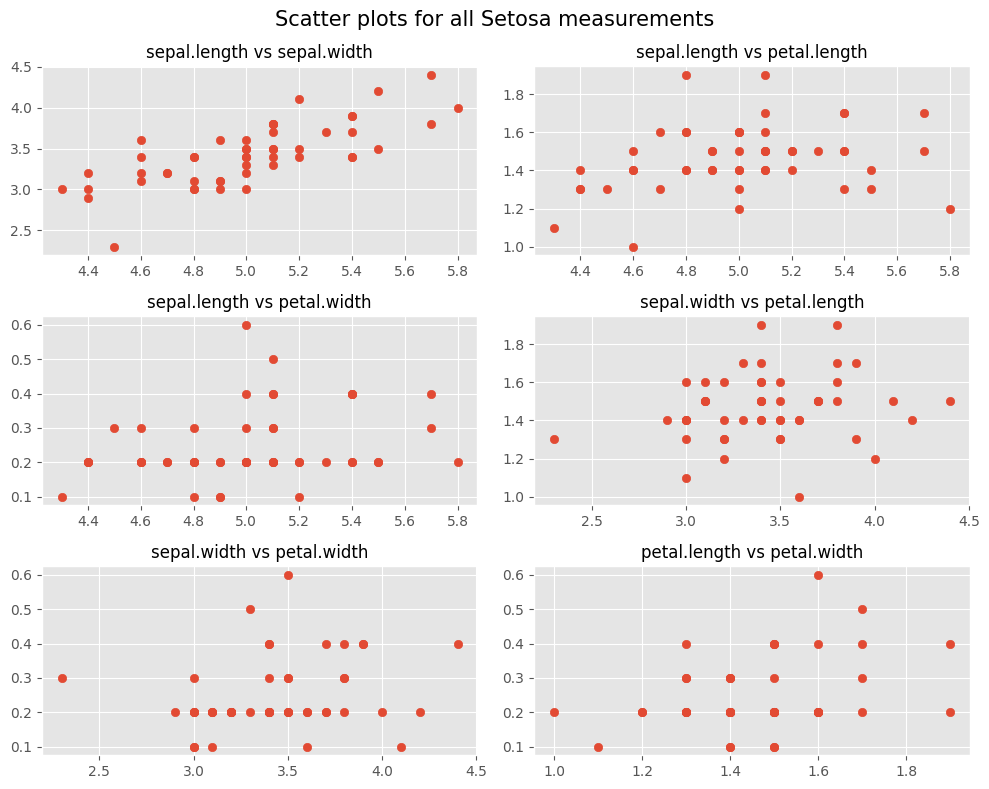

In [321]:
column = setosa.drop("variety", axis=1).columns
fig = plt.figure(figsize=(10,8))
fig.suptitle("Scatter plots for all Setosa measurements", fontsize=15)
index = 1

# Loop through columns and indices to create scatter plots
for i, name_i in enumerate(column):
    for j in range(i+1, len(column)):
        name_j = column[j]
        sub = fig.add_subplot(3, 2, index)
        sub.scatter(setosa[name_i], setosa[name_j])
        sub.set_title(name_i + " vs " + name_j, fontsize=12)
        index += 1

plt.tight_layout()
plt.show()



# Sepal.Length VS Sepal.Width have the strongest [positive] correlation.

### 5.	A heatmap gives a more precise measure than scatter subplots, so create a heatmap
showing the correlations between all pairs of measurements for Setosa irises. Comment on the strongest positive correlation. Is there any evidence of inverse correlations?

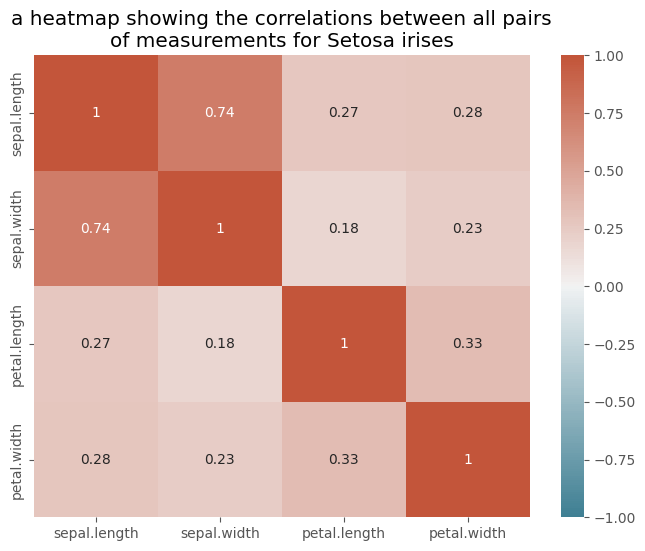

In [310]:
plt.figure(figsize=(8,6))
setosa_corr = setosa.corr(numeric_only=True)
ax = sns.heatmap(setosa_corr, vmin=-1, vmax=1, annot=True, cmap=sns.diverging_palette(220, 20, n=200))
ax.set_xticklabels(ax.get_xticklabels())
plt.title("a heatmap showing the correlations between all pairs\nof measurements for Setosa irises")
plt.show()

# sepal.length and sepal.length have the strongest positive correlation

### 6.	Repeat item 5 for Versicolor irises and then for Virginica irises.

In [323]:
def plot_scatter_plot(data, n=8):
    column = data.drop("variety", axis=1).columns
    fig = plt.figure(figsize=(n+2,n))
    fig.suptitle(f"Scatter plots for all {data.variety.values[0]} measurements", fontsize=15)
    index = 1

    # Loop through columns and indices to create scatter plots
    for i, name_i in enumerate(column):
        for j in range(i+1, len(column)):
            name_j = column[j]
            sub = fig.add_subplot(3, 2, index)
            sub.scatter(data[name_i], data[name_j])
            sub.set_title(name_i + " vs " + name_j, fontsize=12)
            index += 1

    plt.tight_layout()
    plt.show()

### 6.1 Veriscolor Iris Scatter plot

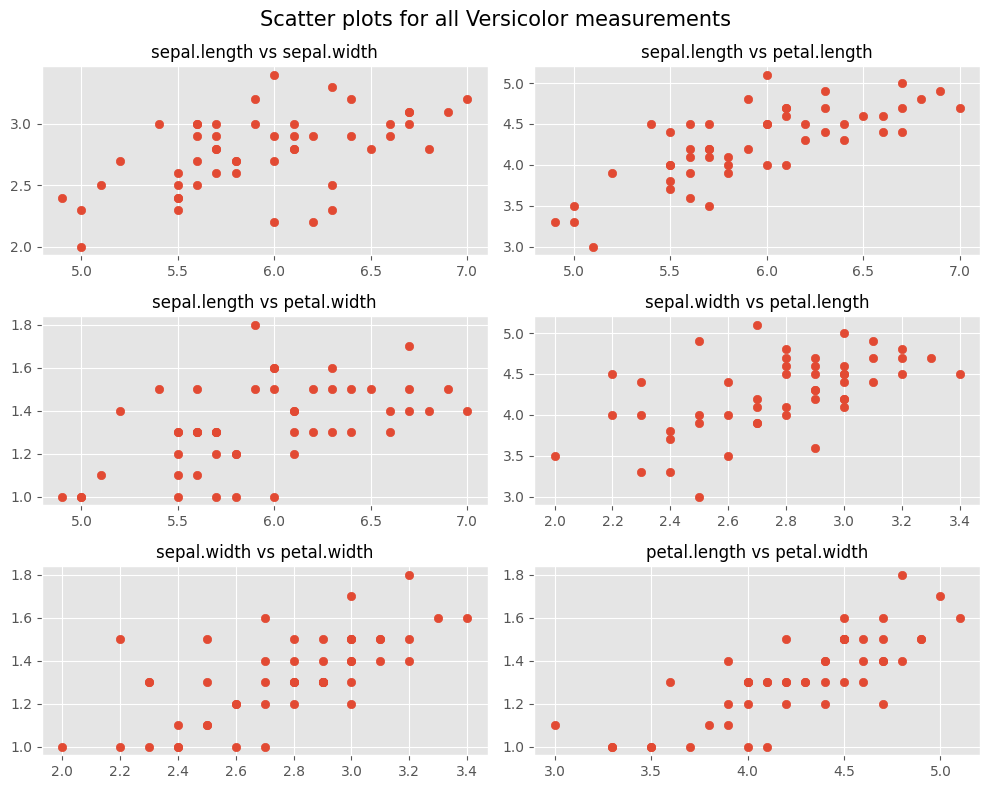

In [324]:
veriscolor = iris[iris.variety == "Versicolor"]
plot_scatter_plot(veriscolor)

### 6.2 Virginica Iris Scatter Plots

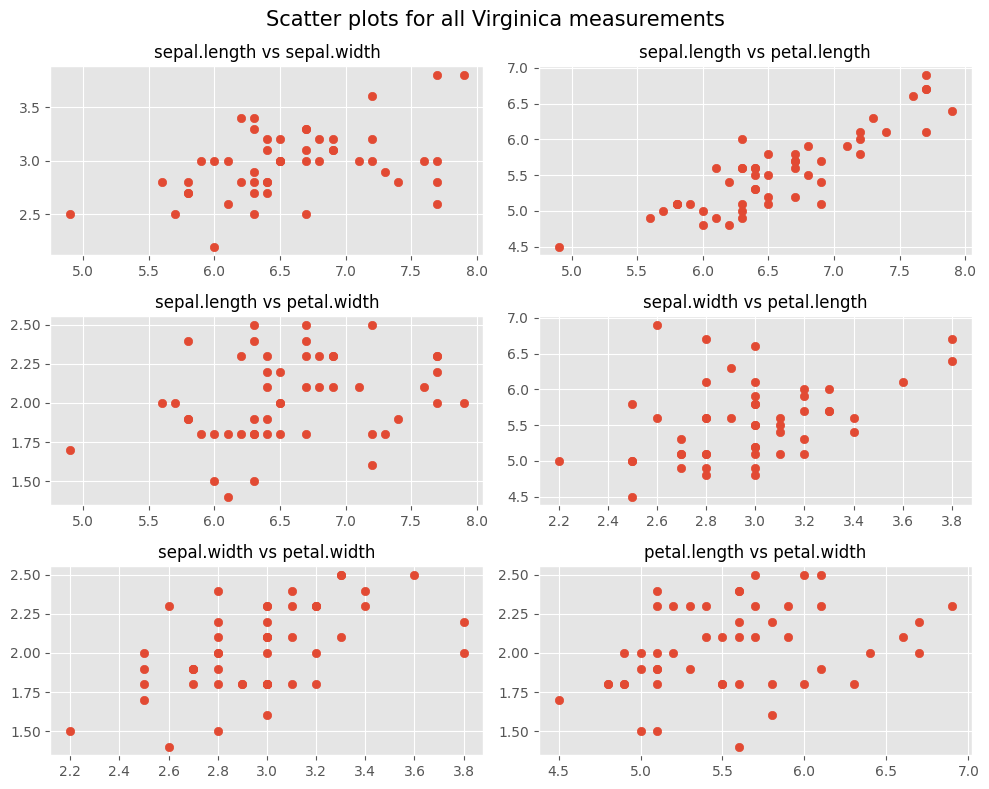

In [325]:
virginica = iris[iris.variety == "Virginica"]
plot_scatter_plot(virginica)

### 7.	Clearly different varieties of iris have different measurement correlations.
It would be nice to summarise this in one single visualisation with different colours for each variety. To achieve this, repeat your code from item 2. However, this time rather than using sub.scatter() to visualise the whole dataset for each pair of measurements, use it repeatedly to visualise each variety. [Hint: replace the line of code containing sub.scatter() with 3 lines, each containing sub.scatter(), but each visualising a different variety].

Your final visualisation should look something like the one below.


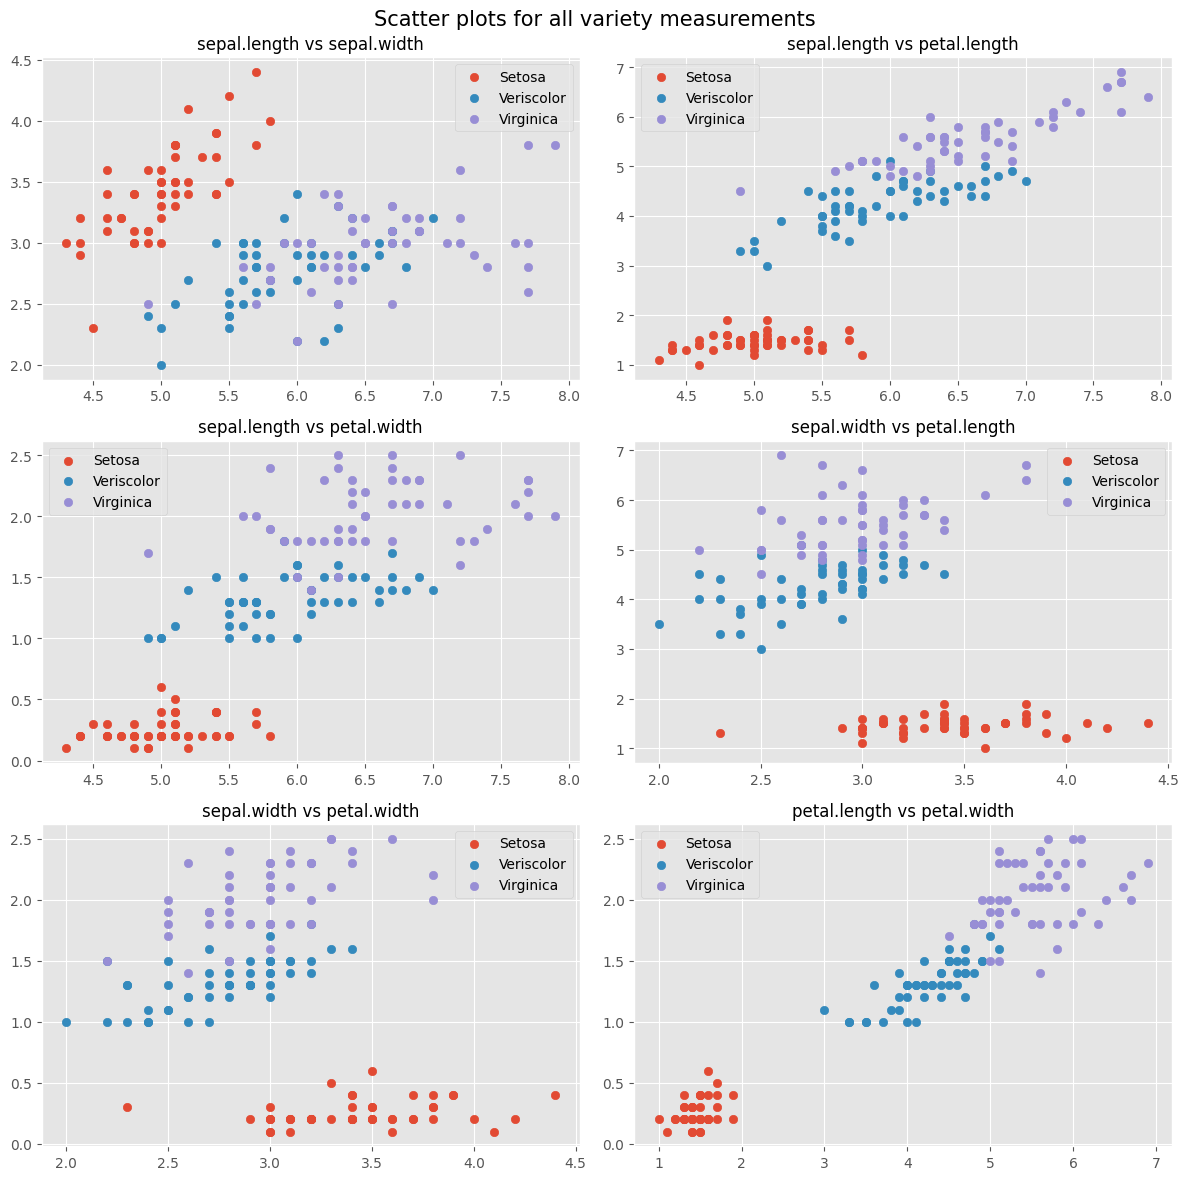

In [332]:
column = iris.drop("variety", axis=1).columns
fig = plt.figure(figsize=(12,12))
fig.suptitle(f"Scatter plots for all variety measurements", fontsize=15)
index = 1

# Loop through columns and indices to create scatter plots
for i, name_i in enumerate(column):
    for j in range(i+1, len(column)):
        name_j = column[j]
        sub = fig.add_subplot(3, 2, index)
        sub.scatter(setosa[name_i], setosa[name_j])
        sub.scatter(veriscolor[name_i], veriscolor[name_j])
        sub.scatter(virginica[name_i], virginica[name_j])
        sub.set_title(name_i + " vs " + name_j, fontsize=12)
        plt.legend(["Setosa", "Veriscolor", "Virginica"], loc="best")
        index += 1
plt.tight_layout()
plt.show()